<a href="https://colab.research.google.com/github/jdocampop9611/Modelado-y-Simulaci-n/blob/master/Metodo_montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodo de Montecarlo

El método de Montecarlo es un método no determinista o estadístico numérico, usado para aproximar expresiones matemáticas complejas y costosas de evaluar con exactitud.

El método de Montecarlo proporciona soluciones aproximadas a una gran variedad de problemas matemáticos posibilitando la realización de experimentos con muestreos de números pseudoaleatorios en una computadora.

# Integración de Montecarlo

Los métodos de integración de Montecarlo son algoritmos para encontrar una evaluación aproximada de una integral definida.

Parte de generar numeros aleatorios en un rango definido (limites de la integral), evaluando estos números en la función que queremos integrar y aprovechando el teorema del valor medio de una integral, es posible calcular una aproximación del resultado.

Según el teorema del valor medio de una integral:

\begin{equation}
\ <F>= \frac{1}{b-a}*\int_{a}^{b}(f(x))dx
\tag{1}
\end{equation}

Despejando (1) tenemos que:

\begin{equation}
\int_{a}^{b}(f(x))dx=\frac{b-a}{N}*\sum_{i=0}^{N}f(x_i)\\
\tag{2}
\end{equation}

# Resolver ODE's con Montecarlo

La ecuacion diferencial ordinaría de la forma:

\begin{equation}
\frac{d}{dt} y(t) = g(y(t), t),\ y(x_0)=y_0
\tag{3}
\end{equation}

Se puede escribir como una ecuación integral de la siguiente forma:

\begin{equation}
y(x)=y(x_0)+\int_{x_0}^{x}f(y(\epsilon))d\epsilon\\
\tag{4}
\end{equation}

Aplicando la tecnica de integración de montecarlo, tenemos que:

\begin{equation}
y(x_i)=y(x_{i-1})+\frac{x_{i}-x_{i-1}}{N}*\sum_{n=0}^{N}f(x_n)\\
\tag{5}
\end{equation}



In [ ]:
import numpy as np
import matplotlib.pyplot  as plt
from random import randint
import math
from scipy import random

In [ ]:
def f(x,t):
  return x**3+2

def f2(x,t):
  xt=1-4*x*(1-x)
  return xt

def fcn (x,t):
  return (-x)

def f3(x,t):
  return np.sin(x)

def f4(x):
  return x**2

In [ ]:
def euler(f,y0,t_ini,t_fin,N):

  h=(t_fin-t_ini)/N
  t=np.linspace(t_ini,t_fin,N)
  y=np.zeros(N)
  y[0]=y0
  for i in range(N-1):
    y[i+1]=y[i]+h*f(y[i],t)
  return y,t

def inte_MC(f,a,b,N):
  xr=random.uniform(a,b,N)
  yr=np.zeros(N)
  t=np.linspace(a,b,N)
  for i in range(N):
    yr[i]=f(xr[i],t)
  rta=(b-a)*np.mean(yr)
  return rta


def ODE_MC(fc,x,y0,N):
  Y=np.zeros(N)
  
  Y[0]=y0  
  for i in range(N-1):
    Y[i+1]=y[i]+inte_MC(fc,x[i],x[i+1],N)
    

  return Y

(array([ 1.,  0.,  2.,  5.,  4.,  5.,  9., 10., 26., 33., 37., 45., 52.,
        76., 73., 87., 80., 81., 68., 68., 54., 48., 41., 36., 30.,  5.,
        11.,  6.,  4.,  3.]),
 array([1.89755742, 1.90374845, 1.90993948, 1.91613052, 1.92232155,
        1.92851258, 1.93470362, 1.94089465, 1.94708568, 1.95327672,
        1.95946775, 1.96565878, 1.97184982, 1.97804085, 1.98423188,
        1.99042292, 1.99661395, 2.00280498, 2.00899602, 2.01518705,
        2.02137808, 2.02756912, 2.03376015, 2.03995118, 2.04614221,
        2.05233325, 2.05852428, 2.06471531, 2.07090635, 2.07709738,
        2.08328841]),
 <a list of 30 Patch objects>)

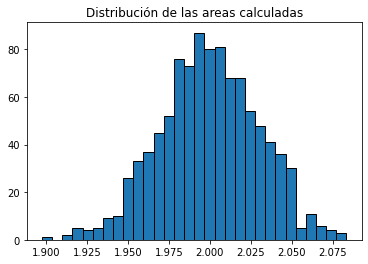

In [ ]:
areas=np.zeros(N)
c=0
d=np.pi
K=1000

for i in range(K):
  areas[i]=inte_MC(f3,c,d,K)

plt.title('Distribución de las areas calculadas')
plt.hist(areas,bins=30,ec='black')

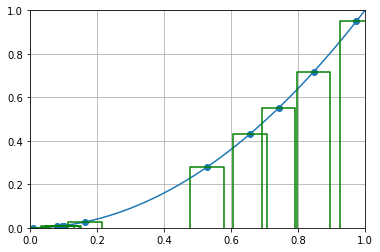

In [ ]:
plt.clf()
ini=0
fin=1
plt.xlim(ini, fin)
plt.ylim(ini, fin)
xe=np.linspace(ini,fin,1000)
plt.plot(xe,f4(xe))
plt.grid()
M=10
dx=(fin-ini)/M
X  = np.random.random(M)*(fin - ini) + ini

plt.scatter(X, f4(X))

for x in X:
    plt.plot([x-dx/2, x-dx/2, x+dx/2, x+dx/2], [0,f4(x), f4(x), 0], color = "g")




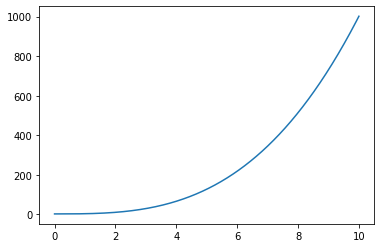

In [ ]:
a=0
b=10
N=1000

x=np.linspace(a,b,N)
t=np.linspace(a,b,N)
y=f(x,t)
y0=0 #Condicion inicial

plt.plot(t,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


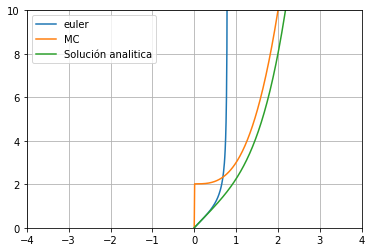

In [ ]:
from scipy.integrate import solve_ivp
Ysolve=solve_ivp(f,[a,b],[y0],t_eval=T)


Y,T=euler(f,y0,a,b,N)
Ode=ODE_MC(f,t,y0,N)

plt.plot(T,Y,label='euler')
plt.plot(T,Ode,label='MC')
plt.plot(T,Ysolve.y[0],label='Solución analitica')

plt.axis([-4,4,0,10])
plt.legend()
plt.grid()




#print(Ode)

0.020020022504083915
0.020020056961967864
0.020020184217157993
0.0
[   0.            2.02002002    2.02002106    2.02002821    2.02004754
    2.02008514    2.02014709    2.02023946    2.02036831    2.02053979
    2.02075986    2.02103465    2.02137038    2.02177293    2.02224845
    2.02280298    2.02344261    2.02417365    2.0250017     2.02593331
    2.0269742     2.02813058    2.02940863    2.03081454    2.03235383
    2.03403311    2.03585807    2.03783562    2.03997108    2.04227049
    2.04474021    2.04738594    2.05021491    2.05323155    2.05644249
    2.05985489    2.06347264    2.0673051     2.07135499    2.07563006
    2.08013674    2.08487862    2.08986635    2.09510066    2.10059251
    2.10634556    2.11236476    2.11865772    2.12523156    2.13208993
    2.13924091    2.14669077    2.15443998    2.16250445    2.17088119
    2.17958247    2.18861178    2.19797547    2.20767692    2.21772813
    2.22813005    2.23889188    2.25001796    2.26151446    2.27338976
    2.2856

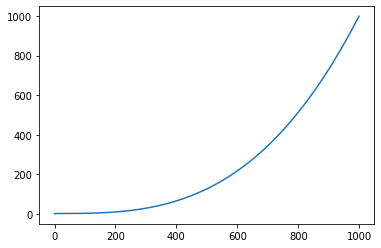

In [ ]:
#print(t)
Z=1000
y0=0
res=inte_MC(f,t[0],t[1],Z)
print(res)

res2=inte_MC(f,t[1],t[2],Z)
print(res2)
res3=inte_MC(f,t[2],t[3],Z)
print(res3)


r1=ODE_MC(f,t,0,Z)
print(r1[0])

print(r1)



plt.plot(resultado)

In [ ]:
n=1
x0=0
s=np.zeros(10)
r=[1,2,3,4,5,6,7,8,9,10]
s[0]=x0
for n in range(10):
  s[n]=r[n]

print(s)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
